In [42]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
import xgboost as xgb
import seaborn as sns
from sklearn import linear_model,tree,ensemble

/Users/anuragsharma/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [26]:
train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')

In [27]:
train.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,label
0,20.306201,7.246964,30.746074,70.738222,82.089549,44.537815,56.908667,17.261529,27.450978,42.425691,7
1,26.752616,16.396760,30.277686,39.271342,80.597014,31.302522,76.580799,50.305849,63.137250,29.514480,3
2,23.448827,14.291499,31.549011,57.424320,86.567170,37.394956,78.454333,44.758231,59.215678,34.578621,4
3,21.998386,10.850202,32.920712,65.819695,86.567170,39.075630,74.004684,50.591210,58.431376,38.060054,3
4,26.188554,10.364373,31.381732,63.537360,98.507465,36.554622,66.042155,52.787542,75.294116,40.018760,6


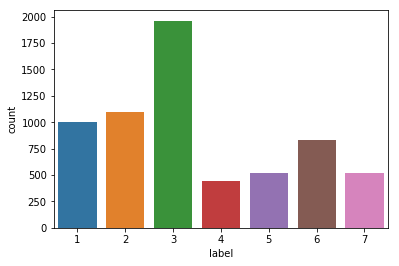

In [28]:
sns.countplot(train['label'])

In [29]:
train.isnull().sum()

feature-1     0
feature-2     0
feature-3     0
feature-4     0
feature-5     0
feature-6     0
feature-7     0
feature-8     0
feature-9     0
feature-10    0
label         0
dtype: int64

In [30]:
features = [x for x in train.columns if x not in ['label']]
target = train['label']

In [72]:
model = xgb.XGBClassifier(n_estimators=900, max_depth=8, subsample=0.5, colsample_bytree=0.8)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
print(cross_val_score(model, train[features], target, cv=5, scoring=make_scorer(accuracy_score)).mean())

0.9872940954829035


In [73]:
model = xgb.XGBClassifier(n_estimators=900, max_depth=8, subsample=0.5, colsample_bytree=0.8)#CatBoostClassifier(verbose=False,loss_function='MultiClass')
model.fit(train[features], target)
pred = model.predict(test)

In [74]:
pred = pred.astype(np.int)
#pred = [item for sublist in pred for item in sublist]
#pred = pred + 1

In [75]:
## make submission
sub = pd.DataFrame()
sub['label'] = pred
sub.to_csv('result.csv', index=False,header=False)

In [76]:
sub.head()

,label
0,6
1,2
2,4
3,6
4,1


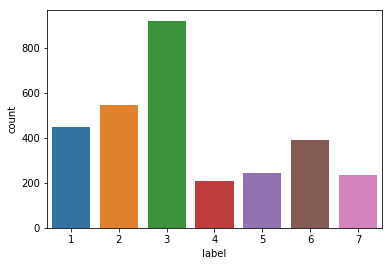

In [77]:
sns.countplot(sub['label'])